# Getting Started: Checking Versions

This code cell imports the required modules, ensures the latest version of your custom `astdot` module is loaded, and prints version information for Python and Graphviz.

- `reload(astdot)` is helpful if you are actively editing `src/astdot.py` without restarting the notebook kernel.
- The `versions` dictionary collects both Python and Graphviz version info.
- The result is displayed using `pprint` for better readability.

In [1]:
import sys
from importlib import reload
from pprint import pprint

import graphviz
from src import astdot


reload(astdot)

versions = {'Python': sys.version, 'Graphviz': graphviz.version()}
pprint(versions)

{'Graphviz': (13, 1, 2),
 'Python': '3.13.3 (main, Apr  9 2025, 03:47:57) [Clang 20.1.0 ]'}


# Example: Defining the Code for AST Analysis

In this block, we assign a simple Python expression to the variable `analyzed_code`.  
This is the code we will analyze and visualize using Python's AST features.

You can replace `analyzed_code` with any valid Python statement or multi-line code (using triple quotes for multi-line). All subsequent visualization and analysis steps will reference this variable.

In [2]:
analyzed_code = """
def fib(n):
    a, b = 0, 1
    for _ in range(n):
        if a % 2 == 0:
            print(a)
        a, b = b, a + b
"""

# Visualizing Python AST with Graphviz and astdot

Let's visualize the Abstract Syntax Tree (AST) of a Python code fragment using the astdot library and Graphviz.

The general workflow:
1. **Parse Python code** to its AST.
2. **Convert the AST** into DOT format (a text representation for graphs).
3. **Render the graph** using `graphviz.Source`.

Below is the query you might use:

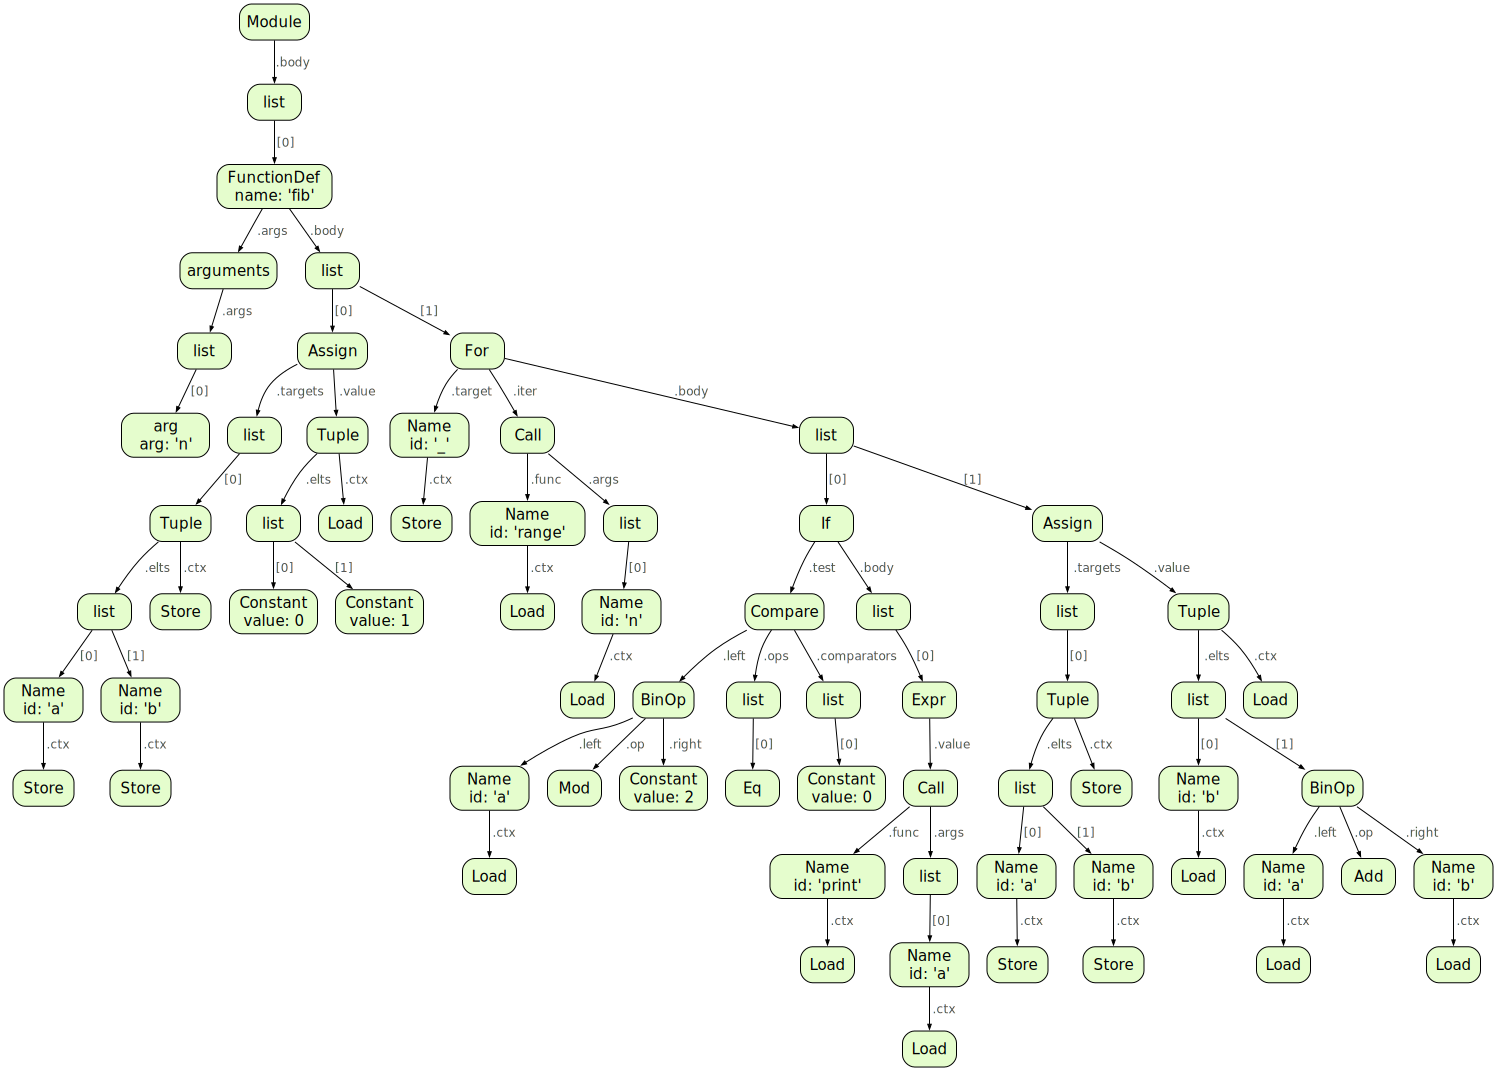

In [3]:
graphviz.Source(astdot.source_to_dot(analyzed_code))

# Comparing Visualizations: Optimized vs. Raw AST

It's often useful to view both the raw (unoptimized) and optimized AST visualizations side by side.  
This helps understand what optimizations change — typically it may flatten or simplify the tree, remove helper nodes, or improve layout for readability.

Here’s how you can compare the two forms using the `optimize` flag:

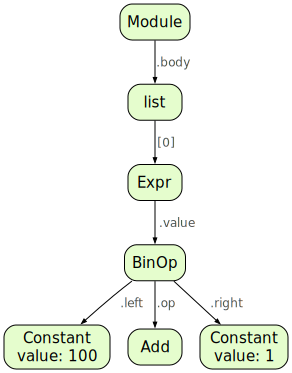

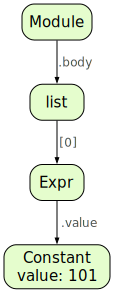

In [4]:
code_sample = '100+1'

# Raw AST visualization (no optimization)
raw_dot = astdot.source_to_dot(source=code_sample)
raw_graph = graphviz.Source(raw_dot)

# Optimized AST visualization
opt_dot = astdot.source_to_dot(source=code_sample, optimize=2)
opt_graph = graphviz.Source(opt_dot)

# Display both in a notebook:
display(raw_graph)
display(opt_graph)

# Evaluating Expressions: `mode='eval'` in AST Visualization

You can customize how the AST is parsed and visualized using the `mode` parameter in `astdot.source_to_dot`.  
Here’s how you can instruct the parser to treat the input as an **expression** (not a full statement or module):

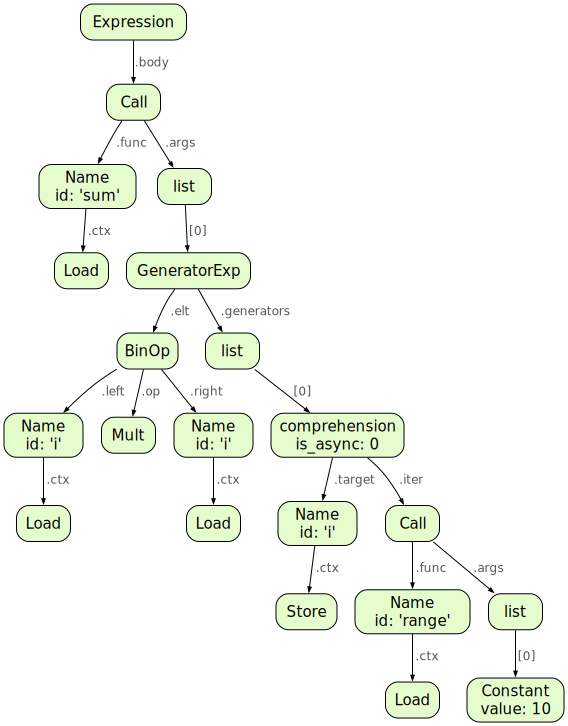

In [5]:
code_sample = 'sum(i*i for i in range(10))'

graphviz.Source(
    astdot.source_to_dot(
        source=code_sample,
        mode='eval',
    )
)

# Customizing the AST Visualization: Using `make_style`

You can control the appearance of your AST graph by generating a custom style dictionary with `astdot.make_style` and passing it to `source_to_dot`. This makes your visualizations clearer, more stylish, or more suitable for publication.

Here's how you set a custom style and generate a graph:


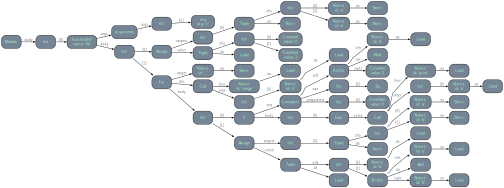

In [6]:
style = astdot.make_style(
    fontname='Menlo',
    fontsize=10,
    edge_fontsize=7,
    rankdir='LR',
    ranksep=0.25,
    nodesep=0.1,
    splines='polyline',
    fillcolor='#758595',
    fontcolor='#A5FDCD',
    width_in=7,
)
graphviz.Source(astdot.source_to_dot(analyzed_code, style=style))

# Visualizing the AST from Function Objects: `object_to_dot`

Instead of passing source code as a string, you can directly analyze a Python object (such as a function).  
This is especially useful when you're working with live Python functions or want to illustrate how your own code is represented as an AST.

Here's how you can do it:

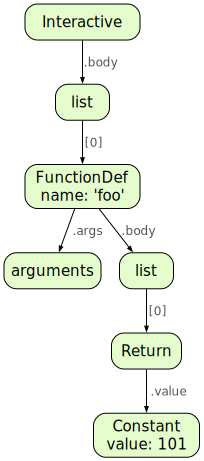

In [7]:
def foo():
    return 100 + 1


graphviz.Source(astdot.object_to_dot(obj=foo, optimize=2, mode='single'))

# Conclusion

You've now seen a complete workflow for visualizing Python Abstract Syntax Trees (AST) interactively in a notebook using the `astdot` and `graphviz`.

**What you learned:**
- How to display version info and set up your environment.
- How to analyze and visualize both strings of Python code and real Python objects (like functions).
- How to switch between raw and optimized tree representations.
- How to use parsing modes (`'exec'`, `'eval'`, `'single'`) for different code types.
- How to style your AST graphs for readability or aesthetics.

Happy coding and exploring Python’s internals!